### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [11]:
diff1 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    mean1 = bootsamp[bootsamp['drinks_coffee']]['height'].mean()
    mean2 = bootsamp[bootsamp['drinks_coffee']==False]['height'].mean()
    diff1.append(mean1-mean2)

In [12]:
np.percentile(diff1, 0.5),np.percentile(diff1, 99.5)

(0.10258900080919674, 2.5388333707966284)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

(array([    8.,    47.,   329.,  1195.,  2592.,  3085.,  1900.,   713.,
          117.,    14.]),
 array([ 2.84743507,  3.11400025,  3.38056542,  3.64713059,  3.91369577,
         4.18026094,  4.44682611,  4.71339129,  4.97995646,  5.24652163,
         5.51308681]),
 <a list of 10 Patch objects>)

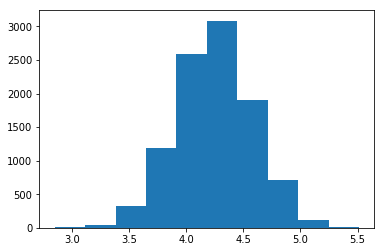

In [24]:
diff2 = []

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    older = bootsamp.query('age == ">=21"')['height'].mean()
    younger = bootsamp.query('age == "<21"')['height'].mean()
    diff2.append(older-younger)
plt.hist(diff2)

In [25]:
np.percentile(diff2,0.5),np.percentile(diff2,99.5)

(3.3652749452554089, 5.0932450670660936)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [28]:
diff3 = []

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    younger1 = bootsamp.query('age == "<21" & drinks_coffee')['height'].mean()
    younger2 = bootsamp.query('age == "<21" & drinks_coffee == False')['height'].mean()
    diff3.append(younger2-younger1)
    
np.percentile(diff3,2.5), np.percentile(diff3,97.5)


(1.0865472983185538, 2.589678962011924)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [29]:
diff4 = []

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    younger1 = bootsamp.query('age == ">=21" & drinks_coffee')['height'].mean()
    younger2 = bootsamp.query('age == ">=21" & drinks_coffee == False')['height'].mean()
    diff4.append(younger2-younger1)
    
np.percentile(diff4,2.5), np.percentile(diff4,97.5)

(1.8489725404049087, 4.4235646586174928)

Within the under 21 and over 21 groups, we saw that on average non-coffee drinkers were taller.  But, when combined, we saw that on average coffee drinkers were on average taller.  This is again **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers.  So these individuals made it seem like coffee drinkers were on average taller - which is a misleading result.  

A larger idea for this is the idea of confounding variables altogether.  You will learn even more about these in the regression section of the course.